In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Replace this with the actual URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Read the dataset
df = pd.read_csv(url, sep=';')

# Display the first few rows
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


X = df.drop('quality', axis=1)
y = df['quality']

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_


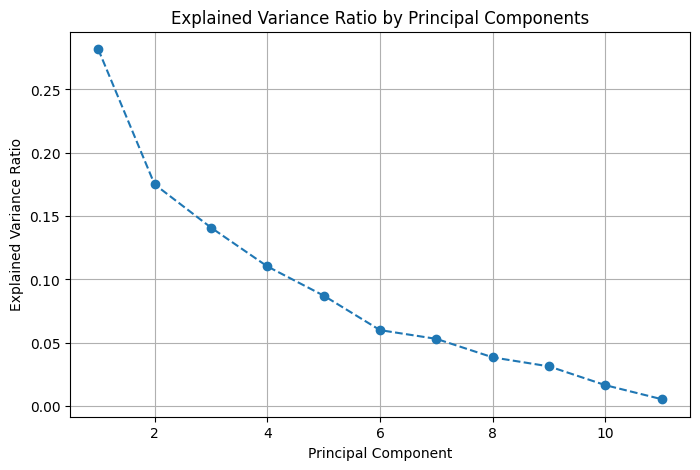

In [4]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [7]:
df.shape

(1599, 12)

In [8]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True, gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)
kpca_recon = kpca.inverse_transform(X_kpca)
kpca_error = ((X_scaled - kpca_recon) ** 2).mean()

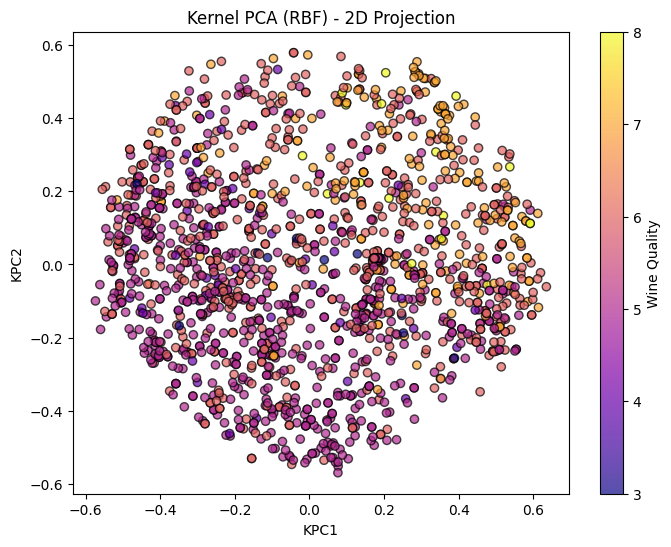

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='plasma', edgecolor='k', alpha=0.7)
plt.title('Kernel PCA (RBF) - 2D Projection')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.colorbar(label='Wine Quality')
plt.show()

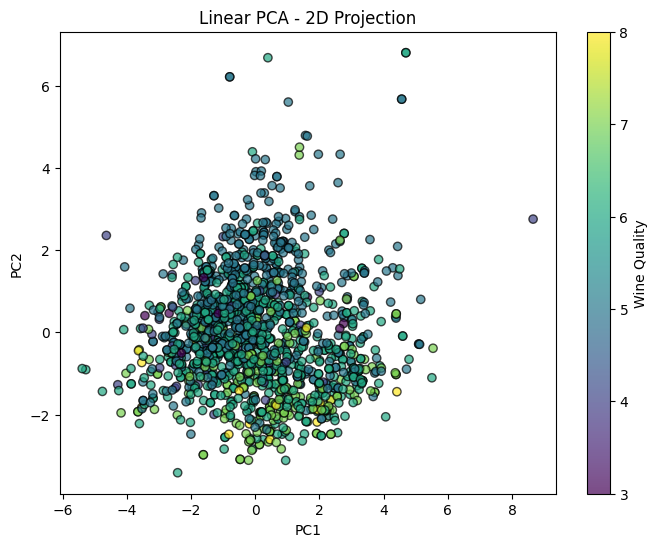

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Linear PCA - 2D Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Wine Quality')
plt.show()
